# Cómo instalar TensorRT en un entorno de conda en Windows

## Paso 1: averigurar tus versiones de CUDA y cuDNN

En la [documentación de instalación de TensorRT](https://docs.nvidia.com/deeplearning/tensorrt/install-guide/index.html) dicen que tienes que instalar CUDA y cuDNN para poder instalar TensorRT. Por suerte, PyTorch las instala por ti cuando haces un `conda install pytorch`. Así que puedes averigurar las versiones con:

In [2]:
import torch

torch.version.cuda, torch.backends.cudnn.version()

('11.7', 8500)

En mi caso, CUDA 11.6 y cuDNN 8.3.0.2

## Paso 2: descargar TensorRT

Desde su web, porque en Windows es la única forma: https://developer.nvidia.com/tensorrt

Y sí: tienes que hacerte cuenta, darles acceso a tu alma y blah blah blah.

Una vez hecho, tenemos que elegir qué versión de TensorRT queremos descargar. A día de hoy, onnxruntime nos dice que (ver abajo de la captura):

<img src=" 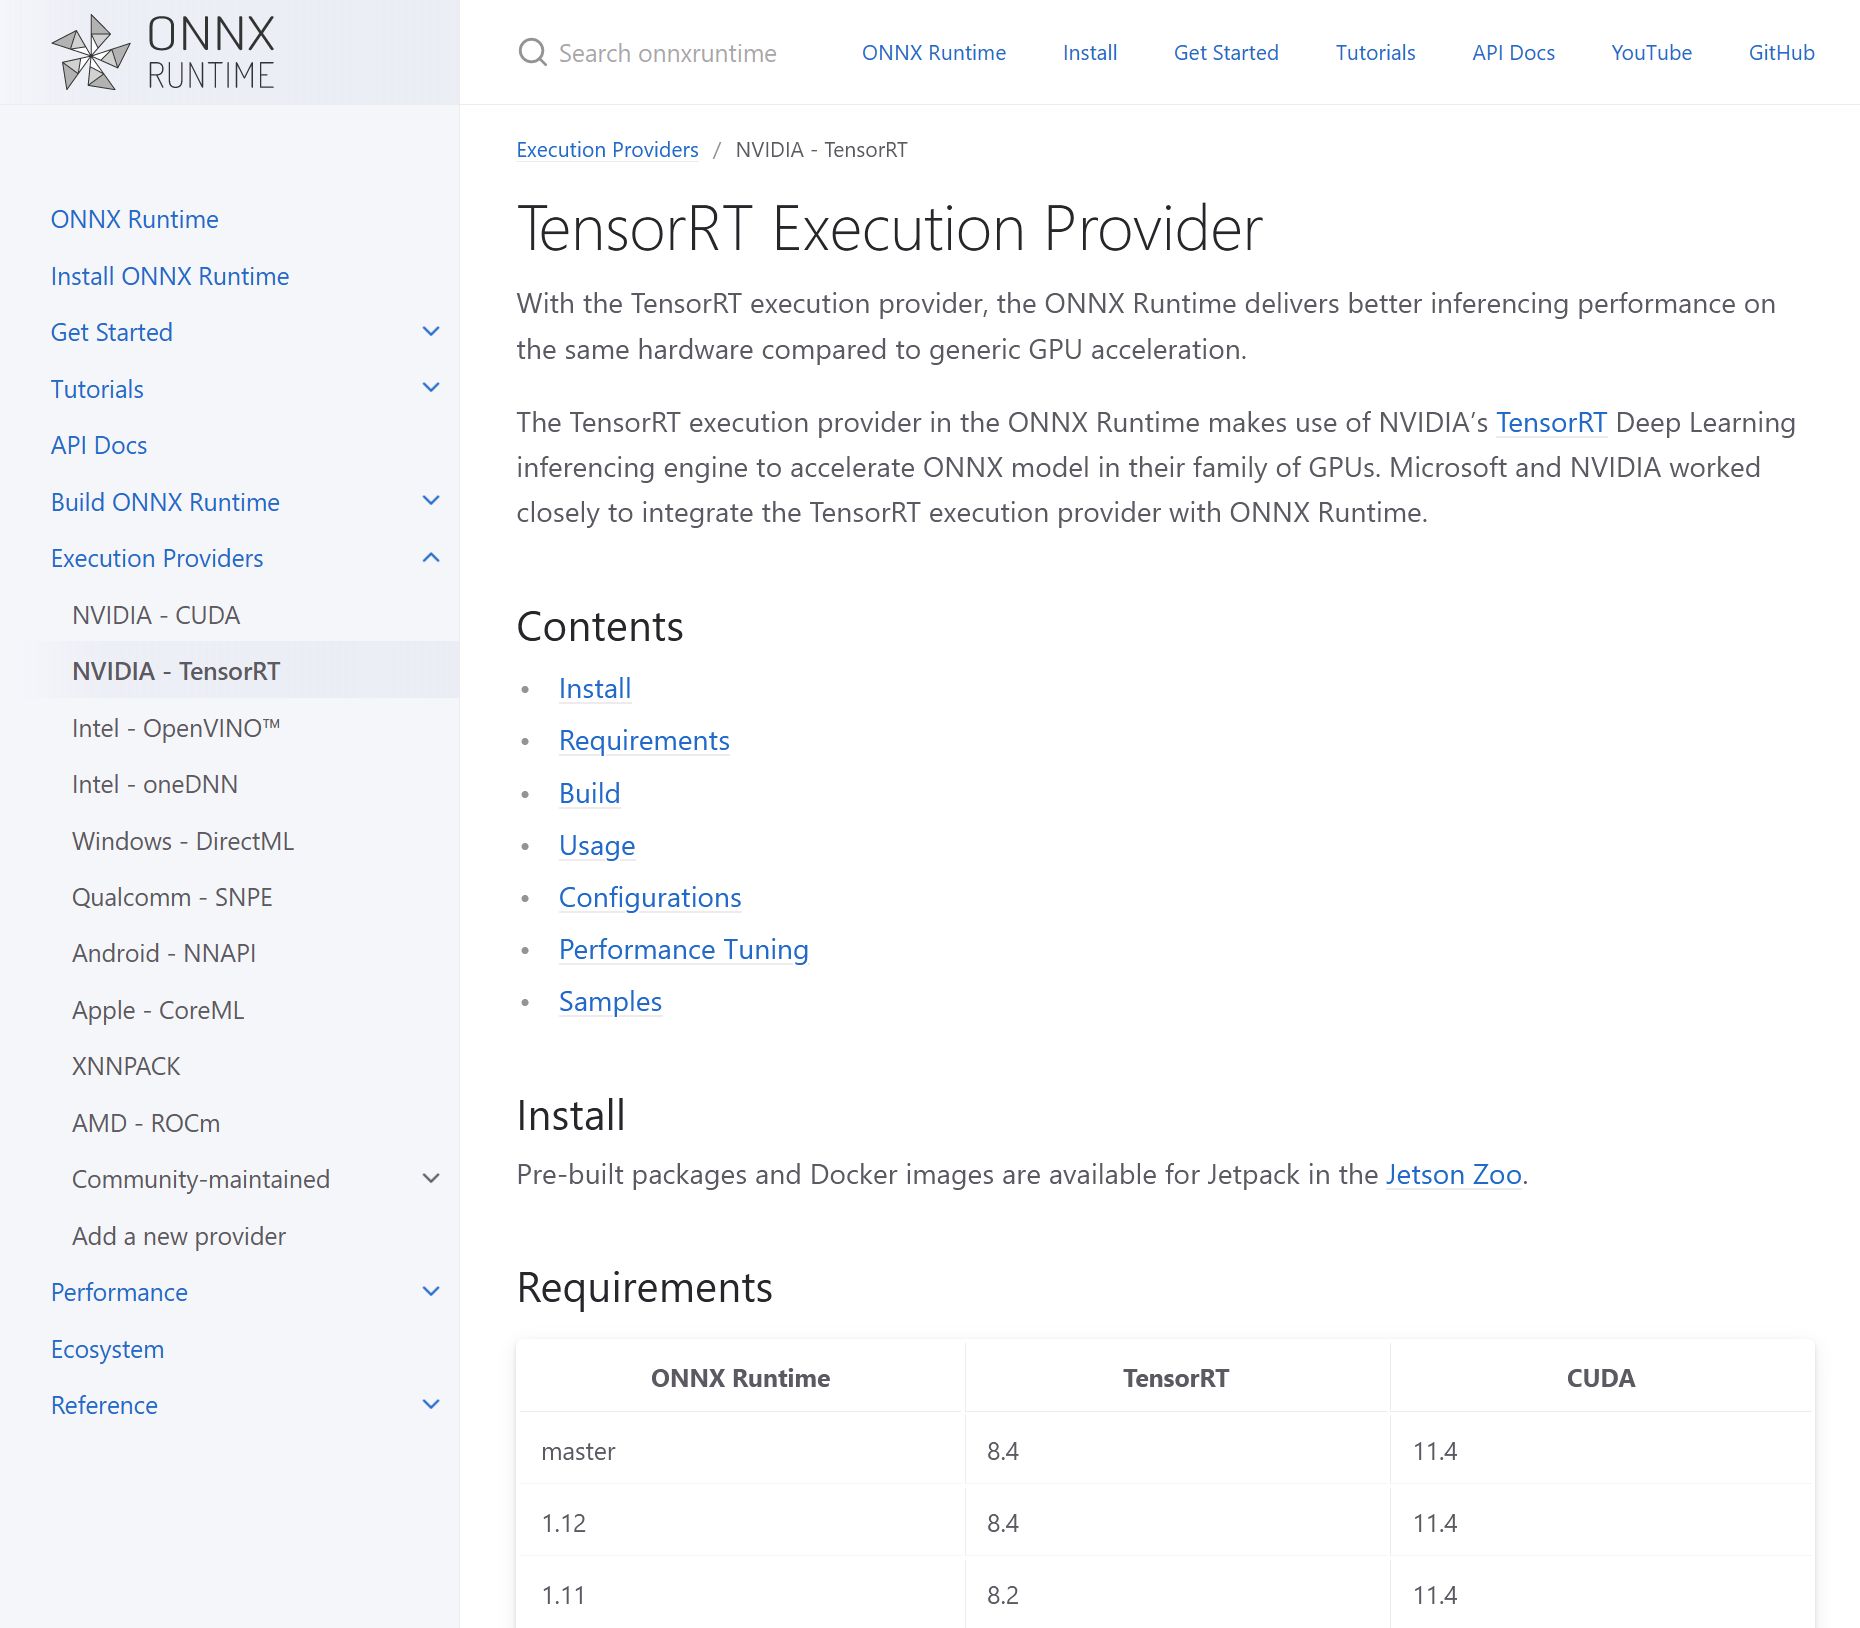"/>

Nos instalemos la versión 8.4.

Pues ya sabiéndolo, vamos a por esa.

Vamos a la página de descargas de TensorRT, y elegimos descargar TensorRT 8; y luego dentro de ésa, la 8.4 (yo he elegido la 8.4 Update 2, pero no debería ser muy importante).

El caso es que al seleccionar la versión, te dirá que para qué sistema operativo la quieres, y qué versión de CUDA tienes:

<img src=" 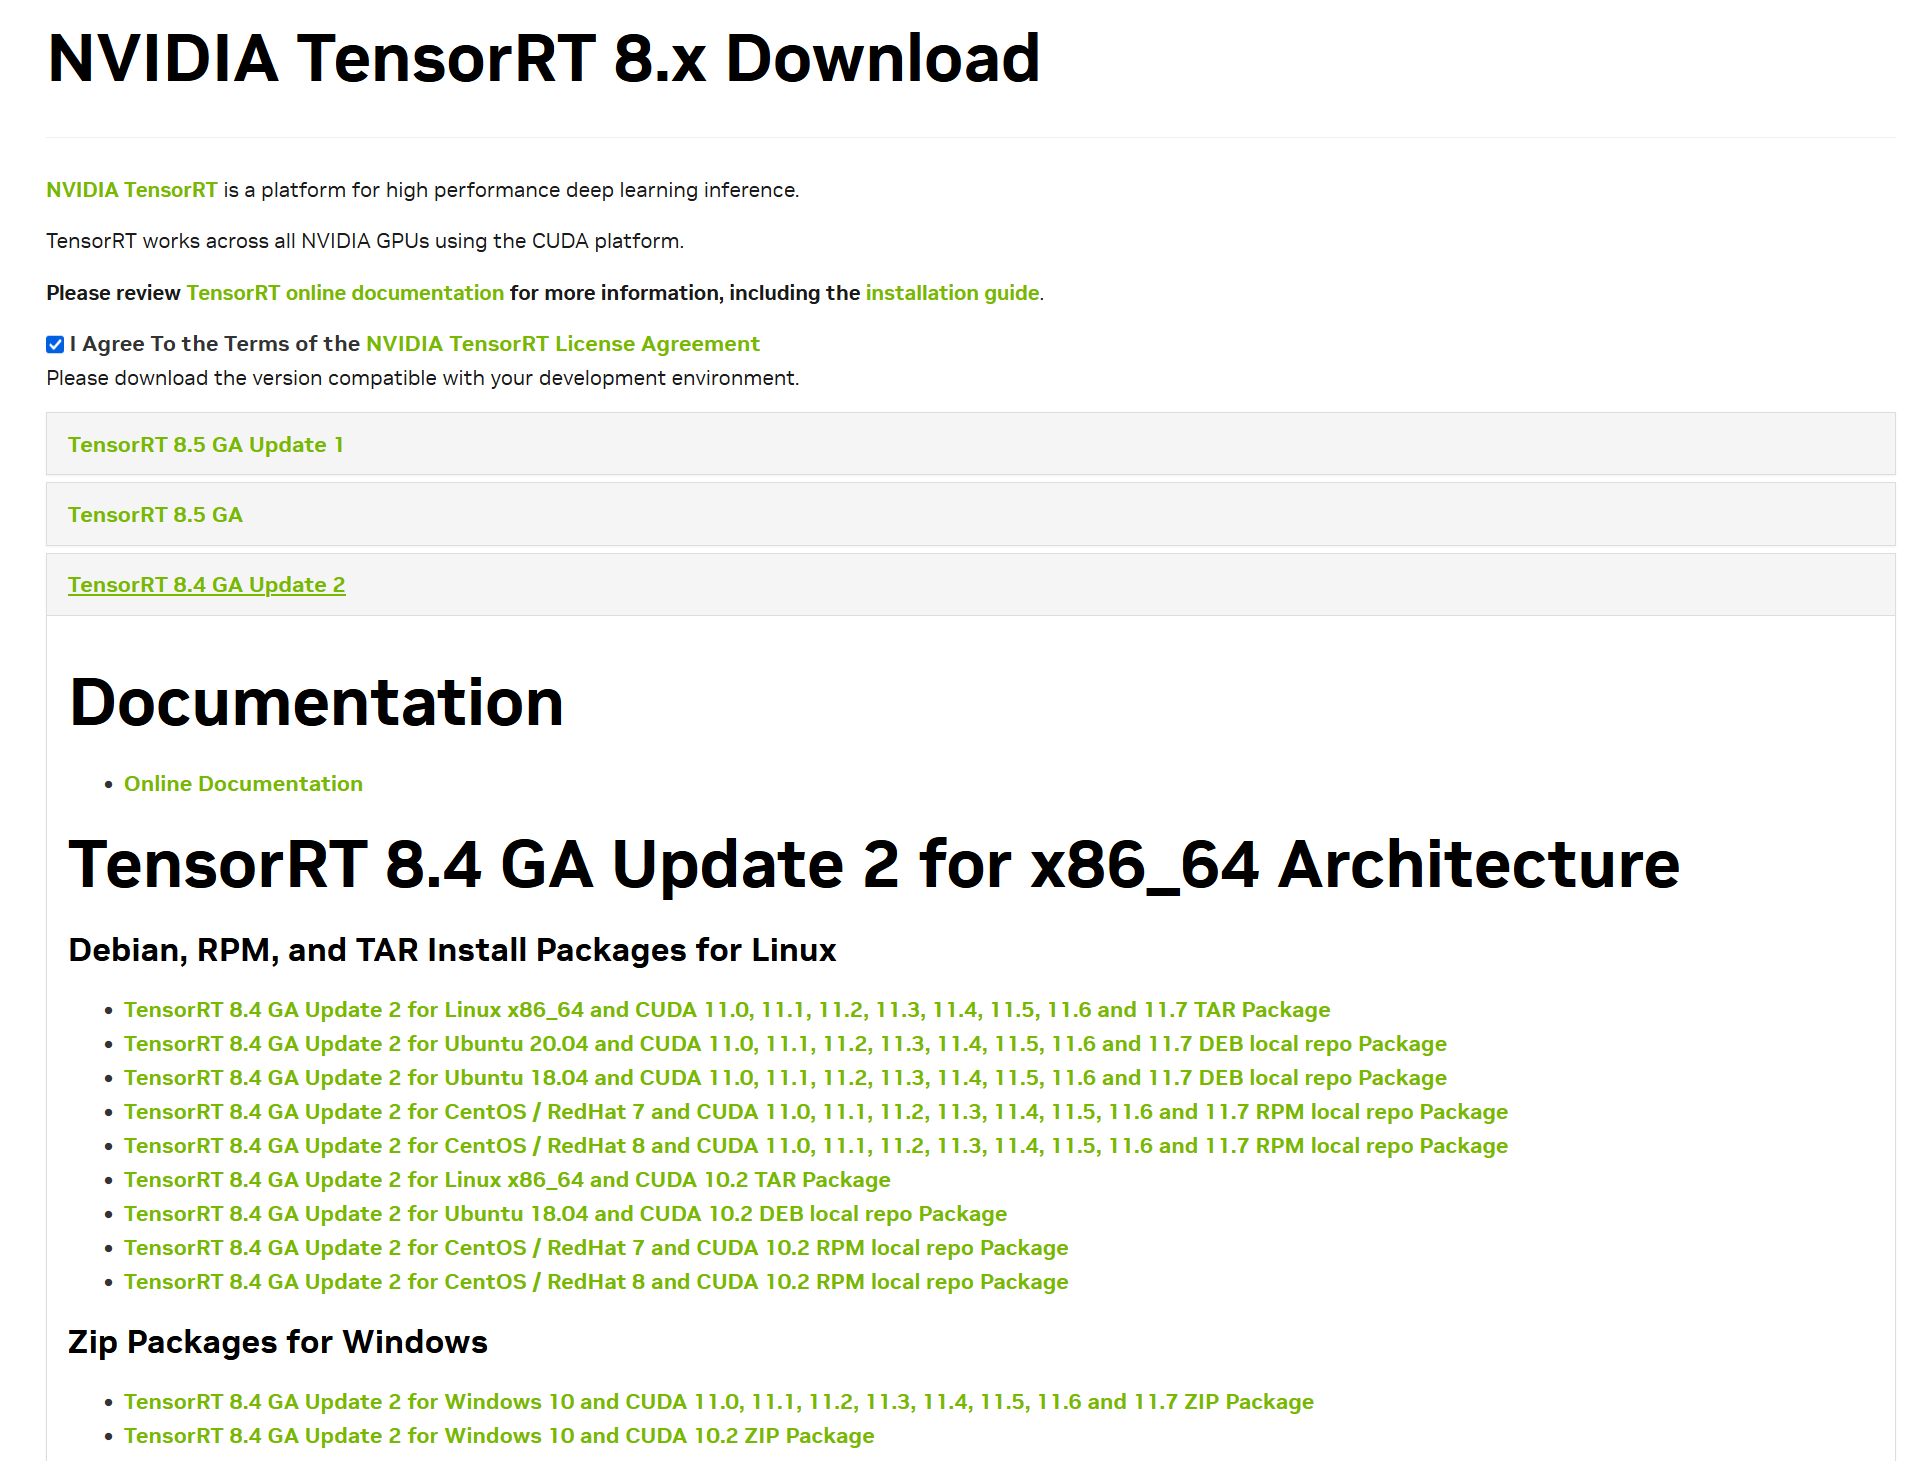"/>

Pues nada, elegimos Windows 10 y cuda 11 (o sea, la segunda por abajo en la captura de pantalla).

Se nos descarga un zip, y lo descomprimimos.

## Paso 3: copiar las DLLs de TensorRT en una carpeta mejor

De la descarga de TensorRT, realmente solo nos importan dos cosas:

1. Las bibliotecas DLL (que son bibliotecas C/C++ compiladas para Windows) de TensorRT, y
2. La biblioteca de Python que usa esas DLLs

Para instalar las DLLs, no hay más que moverlas a una carpeta *que le venga bien a Python*. Para ello, primero tenemos que encontrar las DLLs en la carpeta de TensorRT descargada. Asumiendo que la ruta hasta la carpeta descargada y descomprimida es esta (que en tu ordenador cambiará, así que puedes cambiar la siguiente línea):

In [7]:
path_tensorrt = "D:/Documentos/Universidad/CookieClicker-Bot/TensorRT-8.5.3.1.Windows10.x86_64.cuda-11.8.cudnn8.6"

Las DLLs que nos interesan están en la carpeta `TensorRT-X.X.X.X\lib\`. Así que creamos una lista de Python que nos las liste todas:

In [8]:
import os
from glob import glob

tensorrt_dlls = glob(os.path.join(path_tensorrt, "*", "lib", "*.dll"))
tensorrt_dlls

['D:/Documentos/Universidad/CookieClicker-Bot/TensorRT-8.5.3.1.Windows10.x86_64.cuda-11.8.cudnn8.6\\TensorRT-8.5.3.1\\lib\\nvinfer.dll',
 'D:/Documentos/Universidad/CookieClicker-Bot/TensorRT-8.5.3.1.Windows10.x86_64.cuda-11.8.cudnn8.6\\TensorRT-8.5.3.1\\lib\\nvinfer_builder_resource.dll',
 'D:/Documentos/Universidad/CookieClicker-Bot/TensorRT-8.5.3.1.Windows10.x86_64.cuda-11.8.cudnn8.6\\TensorRT-8.5.3.1\\lib\\nvinfer_plugin.dll',
 'D:/Documentos/Universidad/CookieClicker-Bot/TensorRT-8.5.3.1.Windows10.x86_64.cuda-11.8.cudnn8.6\\TensorRT-8.5.3.1\\lib\\nvonnxparser.dll',
 'D:/Documentos/Universidad/CookieClicker-Bot/TensorRT-8.5.3.1.Windows10.x86_64.cuda-11.8.cudnn8.6\\TensorRT-8.5.3.1\\lib\\nvparsers.dll']

Y ahora tenemos que elegir en qué carpeta queremos copiarlas. Una buena opción es en la carpeta del entorno de conda que vamos a usar (y que es el que estoy usando en este notebook), y dentro de dicho entorno en la carpeta `Library\lib\` vamos a crear una carpeta llamada `tensorrt` por ejemplo:

In [9]:
import sys

tensorrt_dll_directory = os.path.abspath(os.path.join(sys.executable, os.pardir, "Library", "lib", "tensorrt"))
tensorrt_dll_directory

'C:\\Users\\Davimen\\anaconda3\\envs\\clicker-bot\\Library\\lib\\tensorrt'

Y creamos dicha carpeta:

In [10]:
os.makedirs(tensorrt_dll_directory, exist_ok=True)

Y copiamos todas las DLLs en dicha carpeta:

In [11]:
import shutil

for dll in tensorrt_dlls:
    shutil.copy(dll, tensorrt_dll_directory)

## Paso 4: instalar la biblioteca de Python `tensorrt`

Con las DLLs copiadas en un buen sitio, tenemos que instalar la biblioteca `tensorrt` de Python que nos permite usar dichas DLLs desde Python. Para ello: en la carpeta de TensorRT descargada viene una carpeta llamada `python`, que tiene *wheels* (bibliotecas de Python empaquetadas), elegimos el wheel adecuado para instalar. Primero nos apuntamos la ruta hasta dicha carpeta `python`:

In [12]:
python_libraries_path = glob(os.path.join(path_tensorrt, "*", "python"))[0]
python_libraries_path

'D:/Documentos/Universidad/CookieClicker-Bot/TensorRT-8.5.3.1.Windows10.x86_64.cuda-11.8.cudnn8.6\\TensorRT-8.5.3.1\\python'

Y listamos lo que contiene:

In [13]:
glob(os.path.join(python_libraries_path, "*"))

['D:/Documentos/Universidad/CookieClicker-Bot/TensorRT-8.5.3.1.Windows10.x86_64.cuda-11.8.cudnn8.6\\TensorRT-8.5.3.1\\python\\tensorrt-8.5.3.1-cp310-none-win_amd64.whl',
 'D:/Documentos/Universidad/CookieClicker-Bot/TensorRT-8.5.3.1.Windows10.x86_64.cuda-11.8.cudnn8.6\\TensorRT-8.5.3.1\\python\\tensorrt-8.5.3.1-cp36-none-win_amd64.whl',
 'D:/Documentos/Universidad/CookieClicker-Bot/TensorRT-8.5.3.1.Windows10.x86_64.cuda-11.8.cudnn8.6\\TensorRT-8.5.3.1\\python\\tensorrt-8.5.3.1-cp37-none-win_amd64.whl',
 'D:/Documentos/Universidad/CookieClicker-Bot/TensorRT-8.5.3.1.Windows10.x86_64.cuda-11.8.cudnn8.6\\TensorRT-8.5.3.1\\python\\tensorrt-8.5.3.1-cp38-none-win_amd64.whl',
 'D:/Documentos/Universidad/CookieClicker-Bot/TensorRT-8.5.3.1.Windows10.x86_64.cuda-11.8.cudnn8.6\\TensorRT-8.5.3.1\\python\\tensorrt-8.5.3.1-cp39-none-win_amd64.whl']

Efectivamente, tiene unos cuantos instalaladores *wheel*. Solo tenemos que instalar uno: el de la versión de Python de nuestro entorno. En mi caso:

In [14]:
sys.version

'3.10.8 | packaged by conda-forge | (main, Nov 22 2022, 08:16:33) [MSC v.1929 64 bit (AMD64)]'

Tengo Python 3.9, así que instalo el que tiene en el nombre `cp39`. Para instalarlo, simplemente con `pip` (o mejor aún: `python -m pip`, porque a veces Windows es muy canalla y usa un `pip` que no sé de dónde sale, en vez de el del entorno que queremos). Podemos ser guays y hacerlo así desde el notebook:

In [15]:
!{sys.executable} -m pip install {os.path.join(python_libraries_path, "tensorrt-8.5.3.1-cp310-none-win_amd64.whl")}

Processing d:\documentos\universidad\cookieclicker-bot\tensorrt-8.5.3.1.windows10.x86_64.cuda-11.8.cudnn8.6\tensorrt-8.5.3.1\python\tensorrt-8.5.3.1-cp310-none-win_amd64.whl
  Attempting uninstall: tensorrt
    Found existing installation: tensorrt 8.4.3.1
    Uninstalling tensorrt-8.4.3.1:
      Successfully uninstalled tensorrt-8.4.3.1


(Ignora los warnings, es que mi entorno está un poco jodido)

## Paso 5: añadir las DLLs de TensorRT que copiamos antes al PATH

Para que Python (y la biblioteca instalada desde el *wheel*) sepan dónde están las DLLs que hemos copiado a la carpeta que nos venía bien, tenemos que decírselo.

En Windows, Python (y otros programas) van a buscar DLLs a ciertas rutas del sistema operativo: a un listado de rutas que se conocen como el PATH de Windows.

Si la carpeta que hemos creado y en la que hemos puesto las DLLs no está en dicho PATH, no podremos usar TensorRT.

Vamos a ver el PATH de Windows para este proceso de Python. El PATH de Windows es una variable de entorno del proceso, así que podemos verla desde Python haciendo:

In [16]:
os.environ["PATH"]

'C:\\Users\\Davimen\\anaconda3\\envs\\clicker-bot;C:\\Users\\Davimen\\anaconda3\\envs\\clicker-bot\\Library\\mingw-w64\\bin;C:\\Users\\Davimen\\anaconda3\\envs\\clicker-bot\\Library\\usr\\bin;C:\\Users\\Davimen\\anaconda3\\envs\\clicker-bot\\Library\\bin;C:\\Users\\Davimen\\anaconda3\\envs\\clicker-bot\\Scripts;C:\\Users\\Davimen\\anaconda3\\envs\\clicker-bot\\bin;C:\\Users\\Davimen\\anaconda3\\condabin;C:\\Program Files\\Oculus\\Support\\oculus-runtime;C:\\Windows\\system32;C:\\Windows;C:\\Windows\\System32\\Wbem;C:\\Windows\\System32\\WindowsPowerShell\\v1.0;C:\\Windows\\System32\\OpenSSH;C:\\Program Files\\NVIDIA Corporation\\NVIDIA NvDLISR;C:\\Program Files (x86)\\NVIDIA Corporation\\PhysX\\Common;C:\\Program Files\\Git\\cmd;C:\\Users\\Davimen\\AppData\\Local\\Microsoft\\WindowsApps'

Esas rutas (separadas por `;`) son a las que se va Windows a buscar DLLs. Por desgracia, la carpeta que hemos creado y en la que hemos metido las DLLs no está ahí.

¡Vamos a incluirla!

Es tan sencillo como sobreescribir el PATH, añadiendo al final la ruta de la carpeta con nuestras DLLs:

In [17]:
os.environ["PATH"] = os.environ["PATH"] + ";" + tensorrt_dll_directory

Comprobamos:

In [18]:
os.environ["PATH"]

'C:\\Users\\Davimen\\anaconda3\\envs\\clicker-bot;C:\\Users\\Davimen\\anaconda3\\envs\\clicker-bot\\Library\\mingw-w64\\bin;C:\\Users\\Davimen\\anaconda3\\envs\\clicker-bot\\Library\\usr\\bin;C:\\Users\\Davimen\\anaconda3\\envs\\clicker-bot\\Library\\bin;C:\\Users\\Davimen\\anaconda3\\envs\\clicker-bot\\Scripts;C:\\Users\\Davimen\\anaconda3\\envs\\clicker-bot\\bin;C:\\Users\\Davimen\\anaconda3\\condabin;C:\\Program Files\\Oculus\\Support\\oculus-runtime;C:\\Windows\\system32;C:\\Windows;C:\\Windows\\System32\\Wbem;C:\\Windows\\System32\\WindowsPowerShell\\v1.0;C:\\Windows\\System32\\OpenSSH;C:\\Program Files\\NVIDIA Corporation\\NVIDIA NvDLISR;C:\\Program Files (x86)\\NVIDIA Corporation\\PhysX\\Common;C:\\Program Files\\Git\\cmd;C:\\Users\\Davimen\\AppData\\Local\\Microsoft\\WindowsApps;C:\\Users\\Davimen\\anaconda3\\envs\\clicker-bot\\Library\\lib\\tensorrt'

Efectivamente: la última ruta es la que queremos. Siguiente paso.

## Paso 6: añadir las DLLs de cuDNN que Pytorch nos instala al PATH

Resulta que para que TensorRT funcione, necesita las DLLs de TensorRT (que nos hemos encargado de ello en el paso anterior), las de CUDA (que gracias a PyTorch ya están en el PATH, al menos en nuestro entorno de conda), y las de cuDNN.

Estas útlimas es curioso: PyTorch nos instala tanto CUDA como cuDNN cuando hacemos un `conda install pytorch`, pero solo añade al PATH las DLLs de CUDA (y no cuDNN).

No pasa nada: hagámoslo nosotros. Ya te digo yo dónde están las DLLs de cuDNN que necesitamos. Es aquí:

In [19]:
import site

cudnn_directory = os.path.join(site.getsitepackages()[-1], "torch", "lib")

cudnn_directory

'C:\\Users\\Davimen\\anaconda3\\envs\\clicker-bot\\lib\\site-packages\\torch\\lib'

Pues nada: añadimos esta ruta al PATH, igual que hicimos con TensorRT:

In [20]:
os.environ["PATH"] = os.environ["PATH"] + ";" + cudnn_directory

Comprobamos:

In [21]:
os.environ["PATH"]

'C:\\Users\\Davimen\\anaconda3\\envs\\clicker-bot;C:\\Users\\Davimen\\anaconda3\\envs\\clicker-bot\\Library\\mingw-w64\\bin;C:\\Users\\Davimen\\anaconda3\\envs\\clicker-bot\\Library\\usr\\bin;C:\\Users\\Davimen\\anaconda3\\envs\\clicker-bot\\Library\\bin;C:\\Users\\Davimen\\anaconda3\\envs\\clicker-bot\\Scripts;C:\\Users\\Davimen\\anaconda3\\envs\\clicker-bot\\bin;C:\\Users\\Davimen\\anaconda3\\condabin;C:\\Program Files\\Oculus\\Support\\oculus-runtime;C:\\Windows\\system32;C:\\Windows;C:\\Windows\\System32\\Wbem;C:\\Windows\\System32\\WindowsPowerShell\\v1.0;C:\\Windows\\System32\\OpenSSH;C:\\Program Files\\NVIDIA Corporation\\NVIDIA NvDLISR;C:\\Program Files (x86)\\NVIDIA Corporation\\PhysX\\Common;C:\\Program Files\\Git\\cmd;C:\\Users\\Davimen\\AppData\\Local\\Microsoft\\WindowsApps;C:\\Users\\Davimen\\anaconda3\\envs\\clicker-bot\\Library\\lib\\tensorrt;C:\\Users\\Davimen\\anaconda3\\envs\\clicker-bot\\lib\\site-packages\\torch\\lib'

Perfecto. ¡Ya está instalado TensorRT en nuestro entorno de conda! Y lo mejor es que no interferencia con nada más en nuestro sistema operativo: solo está instalado en el entorno de conda; de forma que "fuera de él", no hemos instalado nada.

## Paso 7: probar que onnxruntime pilla bien TensorRT (y que éste funciona)

Pues nada, vamos al lío. Me he creado una red con Pytorch que hace algo random y la he exportado a formato ONNX. Ahora, la cargo con onnxruntime y le digo que únicamente use el provider de TensorRT para asegurarnos de que lo usa (esto asume que tengo instalada con pip la biblioteca `onnxruntime-gpu`):

In [16]:
import onnxruntime as ort

ort_session = ort.InferenceSession("model.onnx", providers=["TensorrtExecutionProvider"])

ValueError: This ORT build has ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider'] enabled. Since ORT 1.9, you are required to explicitly set the providers parameter when instantiating InferenceSession. For example, onnxruntime.InferenceSession(..., providers=['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider'], ...)

Me invento datos para hacer un predict con mi red:

In [31]:
import numpy as np

random_input = np.random.uniform(size=(500, 4000)).astype(np.float32)

Y hago el predict:

In [32]:
ort_session.run(output_names=["output"], input_feed={"input": random_input})[0][:10]

array([[0.5081286 ],
       [0.5008486 ],
       [0.49932754],
       [0.5024793 ],
       [0.5041661 ],
       [0.5001338 ],
       [0.5079692 ],
       [0.50364727],
       [0.5006001 ],
       [0.5093485 ]], dtype=float32)

Salen cosas, así que... ¡Funciona!

## Paso 7: usarlo en otro código de Python

Cuando queramos usar TensorRT, tendremos que añadir las DLLs tanto de TensorRT como de cuDNN al PATH de nuevo. Esto es así porque el PATH de Windows es uno por proceso (o por ventana de terminal/cmd/PowerShell), de forma que cualquier cosa que añadamos al PATH no es permanente; sino que solo sirve para el proceso de Windows en el que lo añadamos (y procesos derivados o *hijos* de éste).

O sea: en nuestro código de Python, tendremos que saber cuál es la ruta de la carpeta donde hemos metido las DLLs de TensorRT:

In [26]:
tensorrt_dll_directory = os.path.abspath(os.path.join(sys.executable, os.pardir, "Library", "lib", "tensorrt"))
tensorrt_dll_directory

'C:\\Users\\MENDEDA7\\Anaconda3\\envs\\clicker-bot\\Library\\lib\\tensorrt'

(Simplemente nos la podemos apuntar)

Y añadir lo siguiente en nuestro código de Python:

In [ ]:
import os
import site

# Averiguar ruta con DLLs de cuDNN:
cudnn_directory = os.path.join(site.getsitepackages()[-1], "torch", "lib")

# Añadir al PATH ruta de DLLs tanto de tensorRT (de la carpeta que creamos)
# como de cuDNN:
os.environ["PATH"] = (os.environ["PATH"] + 
                      ";" + "C:\\Users\\SOTOVJU1\\Anaconda3\\envs\\pytorch\\Library\\lib\\tensorrt" + 
                      ";" + cudnn_directory)

Y ya está. A partir de ahí, puedes ya usar onnxruntime con el provider de TensorRT como hicimos en el Paso 6.